# Exercícios 5 e 6

5. Para um determinado conjunto de dados, aplicar um modelo e plotar as curvas de Precision e Recall, bem como a curva ROC. Teste diferentes parâmetros para o modelo e plote a curva ROC para os diferentes parâmetros. Teste também diferentes limiares de decisão de classificação e analise como esses diferentes limiares afetam as métricas de classificação.
6. Utilize a validação cruzada para avaliar um conjunto de modelos utilizando diferentes métricas. Por fim, monte uma tabela com os resultados.

In [18]:
# Imports

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from pathlib import Path

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import  precision_recall_curve, roc_curve

from mlxtend.plotting import plot_confusion_matrix

In [19]:
# Load the data

filepath = Path('datasets', 'statlog-heart-dataset.csv')
df = pd.read_csv(filepath)

features = df.drop(columns=['class'])
target = df['class']

X = pd.DataFrame(data=features, columns=features.keys())
y = pd.Series(data=target, name='class')

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [21]:
# Model

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

c:\Users\bopj\AppData\Local\miniconda3\envs\MLEARN-BASE\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes'], dtype=object)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

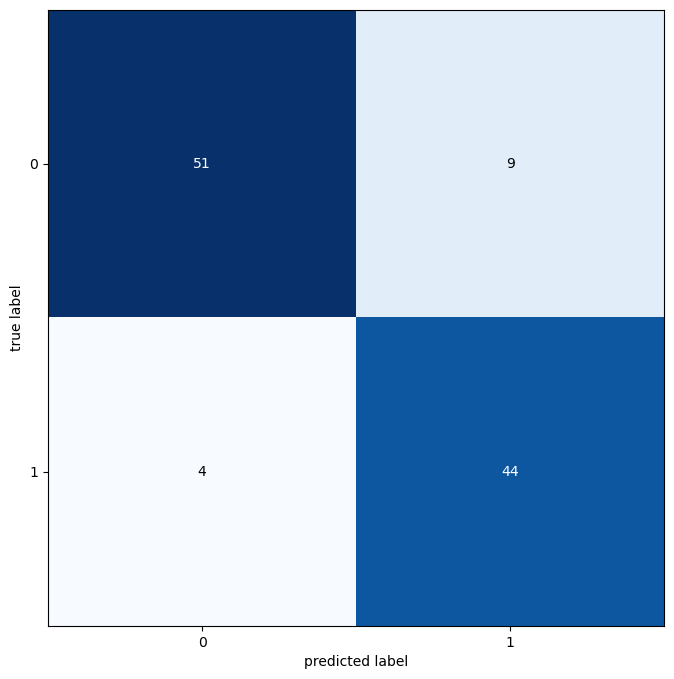

In [23]:
# Confusion Matrix

matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(matrix, figsize=(12, 8))

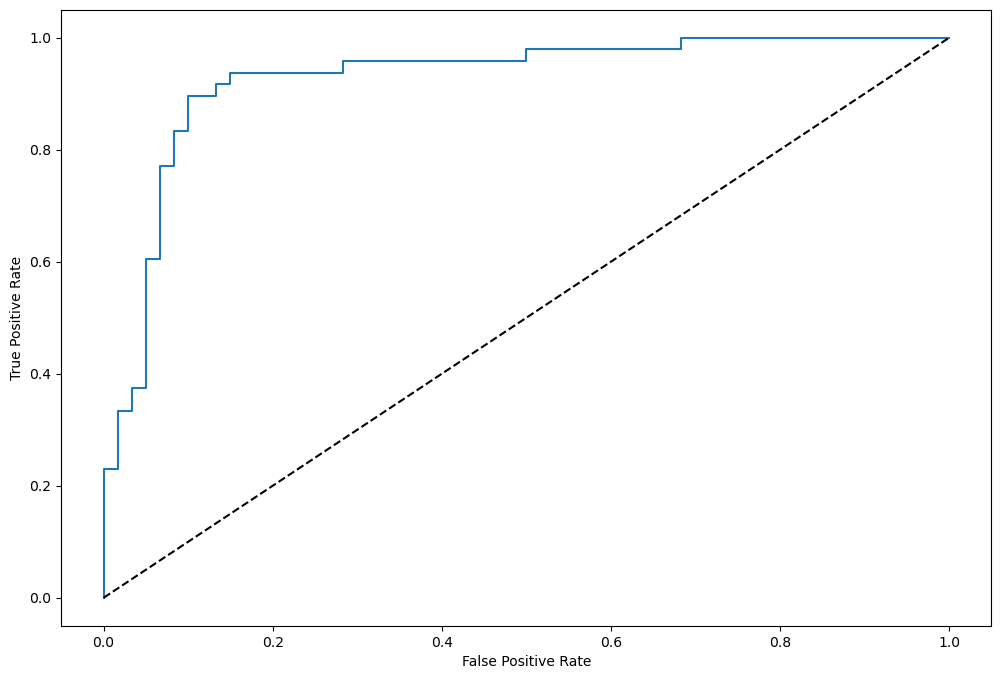

In [30]:
# roc curve

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='yes')

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

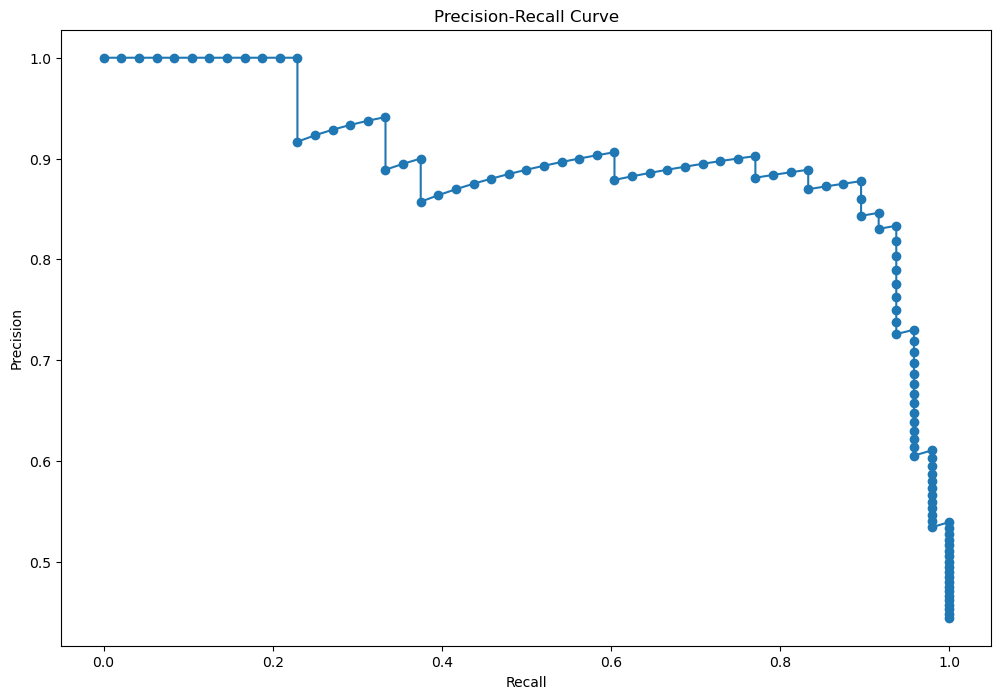

In [31]:
# precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label='yes')

plt.figure(figsize=(12, 8))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()